# Import des résultats du benchmark Whisper large / Whisper large distilled / Whisper large distilled CT2 dans un dataframe pandas pour analyse

In [2]:
import json
import pandas as pd

# --- Charger le JSON fusionné ---
with open("benchmark_results_merged_cpu_gpu.json", "r", encoding="utf-8") as f:
    data = json.load(f)

audio_data = data["data"]

# --- Transformer en DataFrame avec aplatissement ---
rows = []
for audio_file, metrics in audio_data.items():
    row = {"audio_file": audio_file}
    for key, value in metrics.items():
        if isinstance(value, dict):
            # aplatir les sous-clés
            for subkey, subvalue in value.items():
                row[f"{key}_{subkey}"] = subvalue
        else:
            row[key] = value
    rows.append(row)

df = pd.DataFrame(rows)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   audio_file                                         10000 non-null  object 
 1   duration_s                                         10000 non-null  float64
 2   raw_text                                           10000 non-null  object 
 3   whisper_large_cpu_transcription                    10000 non-null  object 
 4   whisper_large_cpu_inference_time_s                 10000 non-null  float64
 5   whisper_large_cpu_elapsed_time_s                   10000 non-null  float64
 6   whisper_large_cpu_real_time_factor                 10000 non-null  float64
 7   whisper_large_distilled_cpu_transcription          10000 non-null  object 
 8   whisper_large_distilled_cpu_inference_time_s       10000 non-null  float64
 9   whisper

In [6]:
df.head()

,audio_file,duration_s,raw_text,whisper_large_cpu_transcription,whisper_large_cpu_inference_time_s,whisper_large_cpu_elapsed_time_s,whisper_large_cpu_real_time_factor,whisper_large_distilled_cpu_transcription,whisper_large_distilled_cpu_inference_time_s,whisper_large_distilled_cpu_elapsed_time_s,...,whisper_large_gpu_real_time_factor,whisper_large_distilled_gpu_transcription,whisper_large_distilled_gpu_inference_time_s,whisper_large_distilled_gpu_elapsed_time_s,whisper_large_distilled_gpu_real_time_factor,whisper_large_distilled_ct2_gpu_transcription,whisper_large_distilled_ct2_gpu_language_detected,whisper_large_distilled_ct2_gpu_inference_time_s,whisper_large_distilled_ct2_gpu_elapsed_time_s,whisper_large_distilled_ct2_gpu_real_time_factor
0,common_voice_fr_17299465.mp3,3.384,Les premiers résultats sont là.,Les premiers résultats sont là.,3.633689,3.639167,1.073785,Les premiers résultats sont là.,3.359511,3.363240,...,0.153473,Les premiers résultats sont là.,0.407646,0.410990,0.120463,Les premiers résultats sont là.,fr,0.133443,0.133444,0.039368
1,common_voice_fr_17301771.mp3,3.384,Je ferai simplement deux observations.,Je ferai simplement 2 observations.,3.734988,3.741864,1.103720,Je ferai simplement 2 observations.,3.434968,3.438293,...,0.152158,Je ferai simplement 2 observations.,0.409504,0.412900,0.121012,Je ferai simplement 2 observations.,fr,0.121567,0.121567,0.035864
2,common_voice_fr_17301930.mp3,3.288,"Chaos, c’est un peu fort","Chaos, est un peu fort.",3.755818,3.760863,1.142280,Cao c'est un peu fort.,3.361716,3.365332,...,0.179407,"Chaos, c'est un peu fort.",0.449656,0.453153,0.136757,"Chaos, c'est un peu fort.",fr,0.137477,0.137478,0.041587
3,common_voice_fr_17302042.mp3,3.696,"Pour cette raison, nous voterons contre cet am...","Pour cette raison, nous voterons contre cet am...",4.068929,4.077954,1.100901,"Pour cette raison, nous voterons contre cet am...",3.484194,3.488107,...,0.177847,"Pour cette raison, nous voterons contre cet am...",0.491035,0.494850,0.132856,"Pour cette raison, nous voterons contre cet am...",fr,0.123166,0.123167,0.033274
4,common_voice_fr_17302494.mp3,3.744,Cela ne nous paraît pas juste.,Cela ne nous paraît pas juste.,3.875924,3.882903,1.035236,Cela ne nous paraît pas juste.,3.458905,3.462312,...,0.150776,Cela ne nous paraît pas juste.,0.435837,0.439178,0.116409,Cela ne nous paraît pas juste.,fr,0.132956,0.132957,0.035458


# Benchmark rapidité

In [14]:
import pandas as pd

# df : ton DataFrame complet

# Identifier tous les modèles à partir des colonnes
models = set()
for col in df.columns:
    if col.endswith("_inference_time_s"):
        models.add(col.replace("_inference_time_s", ""))
    elif col.endswith("_elapsed_time_s"):
        models.add(col.replace("_elapsed_time_s", ""))
    elif col.endswith("_real_time_factor"):
        models.add(col.replace("_real_time_factor", ""))

# Créer un DataFrame résumé
summary = []

for model in models:
    row = {"model": model}
    inf_col = f"{model}_inference_time_s"
    elap_col = f"{model}_elapsed_time_s"
    rtf_col = f"{model}_real_time_factor"

    # Sommes et moyennes
    row["sum_duration_s"] = df["duration_s"].sum()  # somme globale
    row["mean_duration_s"] = df["duration_s"].mean()  # nouvelle colonne

    if inf_col in df.columns:
        row["sum_inference_time_s"] = df[inf_col].sum()
        row["mean_inference_time_s"] = df[inf_col].mean()
    if elap_col in df.columns:
        row["sum_elapsed_time_s"] = df[elap_col].sum()
        row["mean_elapsed_time_s"] = df[elap_col].mean()
    if rtf_col in df.columns:
        row["mean_real_time_factor"] = df[rtf_col].mean()

    summary.append(row)

summary_df = pd.DataFrame(summary)


# Tri par ordre décroissant sur sum_elapsed_time_s

In [15]:
# Trier par sum_elapsed_time_s décroissant
summary_df_sorted = summary_df.sort_values(by="sum_elapsed_time_s", ascending=False)

# Réinitialiser l'index si besoin
summary_df_sorted = summary_df_sorted.reset_index(drop=True)

# Rappel de la définition des métriques

| Métrique                 | Définition détaillée                                                                                                                                                                      | Calcul dans le code                  |
| ------------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------ |
| `inference_time_s`       | Temps strictement nécessaire pour que le modèle génère la transcription à partir des features d?entrée. Ne comprend pas le chargement de l?audio, le prétraitement ou le post-traitement. | `inf_end - inf_start`                |
| `elapsed_time_s`         | Temps total écoulé pour traiter complètement l?audio : chargement du fichier, prétraitement, génération de la transcription et post-traitement éventuel.                                  | `global_end - global_start`          |
| `real_time_factor (RTF)` | Mesure de vitesse relative : combien de fois l?inférence prend par rapport à la durée réelle de l?audio. RTF < 1 signifie que le modèle est plus rapide que le temps réel.                | `(inf_end - inf_start) / duration_s` |


In [16]:
summary_df_sorted

,model,sum_duration_s,mean_duration_s,sum_inference_time_s,mean_inference_time_s,sum_elapsed_time_s,mean_elapsed_time_s,mean_real_time_factor
0,whisper_large_cpu,49532.605438,4.953261,42941.832988,4.294183,42992.729926,4.299273,0.955250
1,whisper_large_distilled_cpu,49532.605438,4.953261,36537.387002,3.653739,36573.523124,3.657352,0.820104
2,whisper_large_gpu,49532.605438,4.953261,9292.409067,0.929241,9656.899080,0.965690,0.199607
3,whisper_large_distilled_gpu,49532.605438,4.953261,6719.262476,0.671926,7080.568618,0.708057,0.146443
4,whisper_large_distilled_ct2_cpu,49532.605438,4.953261,2435.756503,0.243576,2435.763707,0.243576,0.055409
5,whisper_large_distilled_ct2_gpu,49532.605438,4.953261,1322.998474,0.132300,1323.007971,0.132301,0.029884


# Création de graphiques pour visualiser

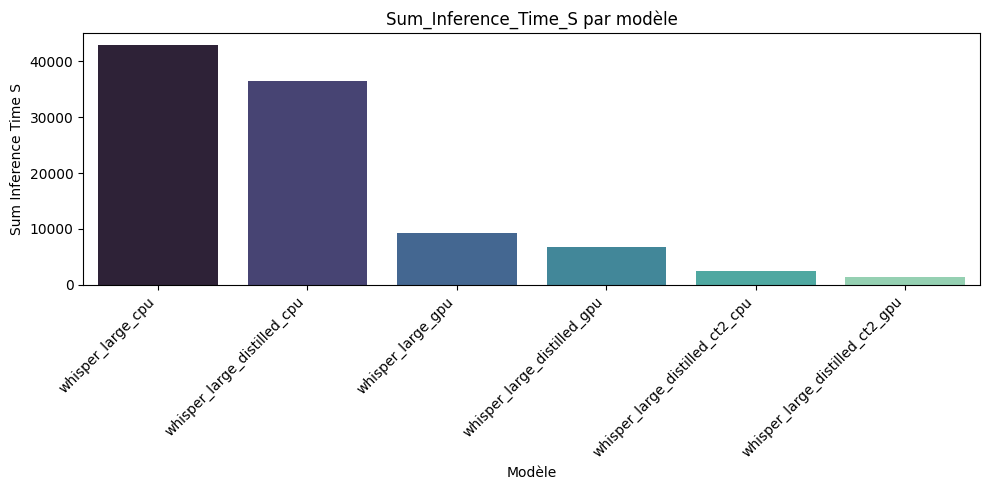

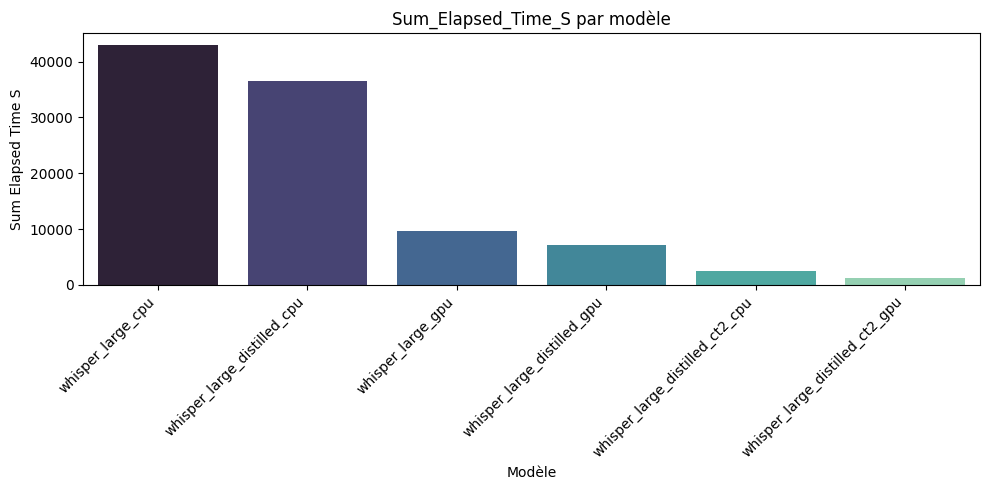

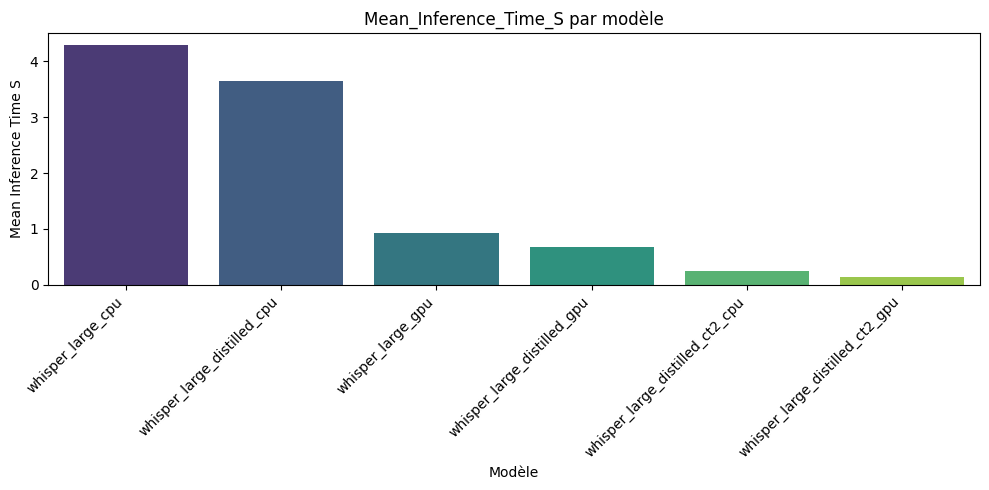

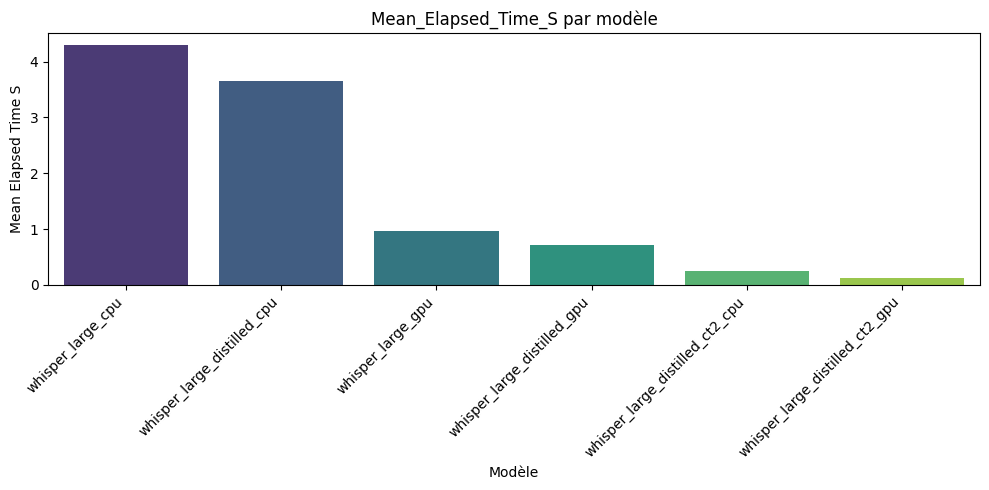

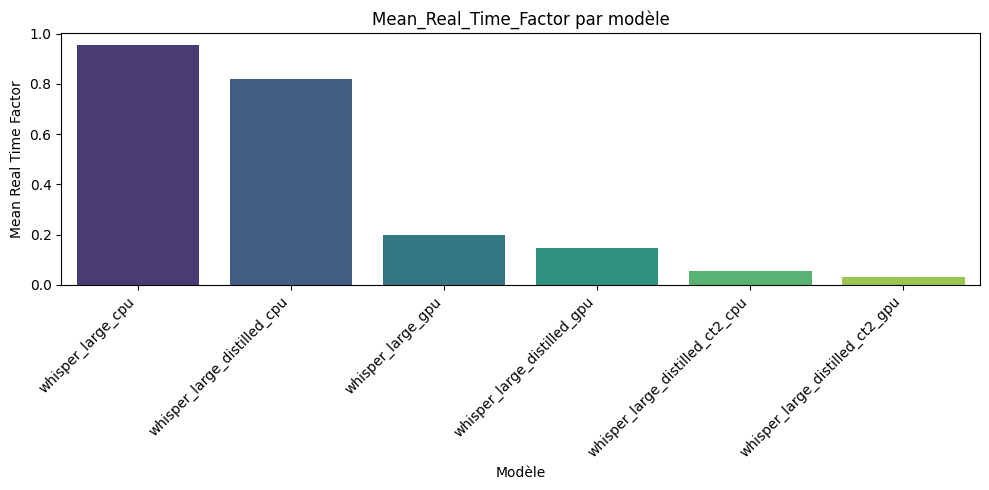

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# =======================
# Barplots pour les sommes
# =======================
sum_metrics = ['sum_inference_time_s', 'sum_elapsed_time_s']

for metric in sum_metrics:
    df_plot = summary_df.sort_values(by=metric, ascending=False)
    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=df_plot,
        x="model",
        y=metric,
        hue="model",      # couleur par modèle
        dodge=False,
        palette="mako",
        legend=False
    )
    plt.xticks(rotation=45, ha='right')
    plt.title(f"{metric.title()} par modèle")
    plt.ylabel(metric.replace('_', ' ').title())
    plt.xlabel("Modèle")
    plt.tight_layout()
    plt.show()

# =======================
# Barplots pour les moyennes
# =======================
mean_metrics = ['mean_inference_time_s', 'mean_elapsed_time_s', 'mean_real_time_factor']

for metric in mean_metrics:
    df_plot = summary_df.sort_values(by=metric, ascending=False)
    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=df_plot,
        x="model",
        y=metric,
        hue="model",
        dodge=False,
        palette="viridis",
        legend=False
    )
    plt.xticks(rotation=45, ha='right')
    plt.title(f"{metric.title()} par modèle")
    plt.ylabel(metric.replace('_', ' ').title())
    plt.xlabel("Modèle")
    plt.tight_layout()
    plt.show()


# Observations
- ## On peut remarquer que l'utilisation de GPU amène à de biens meilleures performances en terme de rapidité.
- ## Le gain en rapidité lorsque l'on utilise le modèle CT2 est cependant moins significatif ( ~ 2 x plus rapide).
- ## L'utilisation de faster-whisper permet d'arriver à des performances en rapidité supérieures à celles observées avec le GPU sur les modèles sans le moteur d'inférence CT2.
- ## Les meilleures résultats sont obtenus avec le modèle distilled + CT2 avec un GPU.
- ## Avec la configuration distilled + CT2 + GPU 49352 secondes d'audio sont transcrites en 1323 secondes . **Pour transcrire un heure , il faudrait alors à peu près 1 minute 30 secondes**. 

# Analyse de la distribution du texte à transcrire

Nombre de mots différents : 24691
Nombre de caractères différents : 106
Top 10 mots les plus fréquents : [('de', 4750), ('la', 2949), ('le', 2452), ('est', 2027), ('à', 1907), ('il', 1883), ('et', 1721), ('les', 1580), ('des', 1288), ('en', 1146)]
Top 10 caractères les plus fréquents : [('e', 70135), ('s', 38259), ('a', 36912), ('i', 34890), ('t', 34790), ('n', 34450), ('r', 32311), ('l', 29456), ('u', 26425), ('o', 25310)]


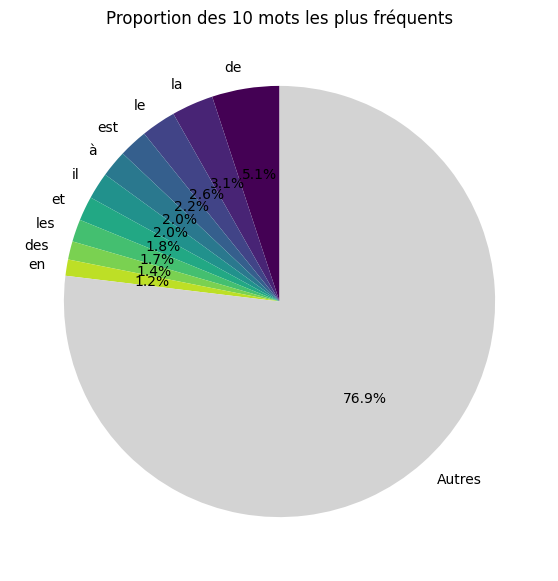

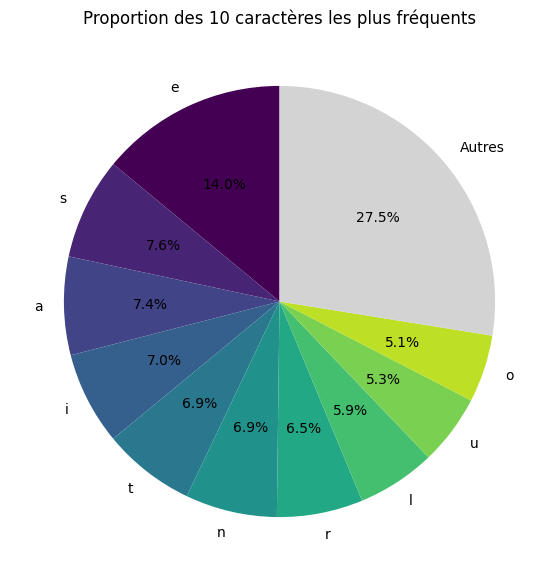

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# -------------------------------
# Préparer le texte
# -------------------------------
all_text = " ".join(df["raw_text"].astype(str))  # concaténer toutes les phrases
all_text_lower = all_text.lower()                 # uniformiser la casse

# -------------------------------
# Compter les mots
# -------------------------------
words = all_text_lower.split()                    # split sur espaces uniquement
word_counts = Counter(words)
num_words = len(word_counts)
top10_words = word_counts.most_common(10)

# -------------------------------
# Compter les caractères
# -------------------------------
chars = list(all_text_lower.replace(" ", ""))     # enlever les espaces
char_counts = Counter(chars)
num_chars = len(char_counts)
top10_chars = char_counts.most_common(10)

print(f"Nombre de mots différents : {num_words}")
print(f"Nombre de caractères différents : {num_chars}")
print(f"Top 10 mots les plus fréquents : {top10_words}")
print(f"Top 10 caractères les plus fréquents : {top10_chars}")

# -------------------------------
# Fonction pour diagramme circulaire avec couleur spécifique pour "Autres"
# -------------------------------
def plot_pie_top10(counter, title):
    total = sum(counter.values())
    top10 = counter.most_common(10)
    other_count = total - sum([c for _, c in top10])
    
    labels = [w for w, _ in top10] + ["Autres"]
    sizes = [c for _, c in top10] + [other_count]
    
    # Palette : viridis pour top10 + gris pour "Autres"
    import matplotlib.cm as cm
    import numpy as np
    colors = [cm.viridis(i/10) for i in range(10)] + ["lightgrey"]
    
    fig, ax = plt.subplots(figsize=(7,7))
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(title)
    plt.show()

# -------------------------------
# Afficher diagrammes circulaires
# -------------------------------
plot_pie_top10(word_counts, "Proportion des 10 mots les plus fréquents")
plot_pie_top10(char_counts, "Proportion des 10 caractères les plus fréquents")



=== Analyse erreurs pour whisper_large_cpu ===
Top 10 mots mal transcrits : [('deux', 293), ('de', 195), ('trois', 145), ('c’est', 129), ('quatre', 126), ('et', 117), ('à', 114), ('cent', 104), ('la', 103), ('le', 97)]


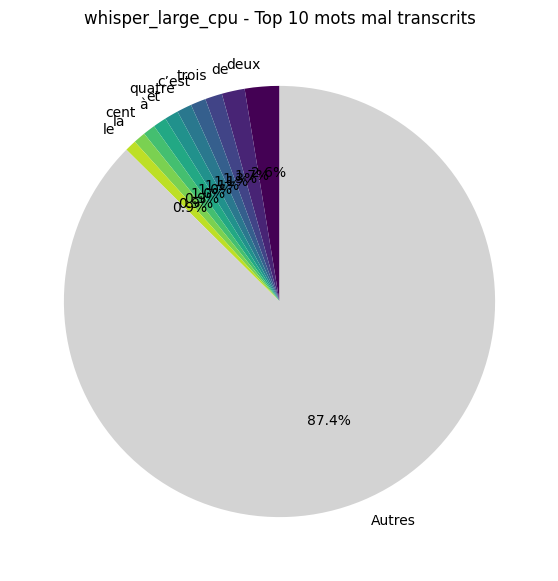

Top 10 caractères mal transcrits : [('e', 13048), ('a', 7301), ('s', 7059), ('i', 7055), ('t', 6841), ('n', 6688), ('r', 6679), ('u', 5641), ('o', 5069), ('l', 4592)]


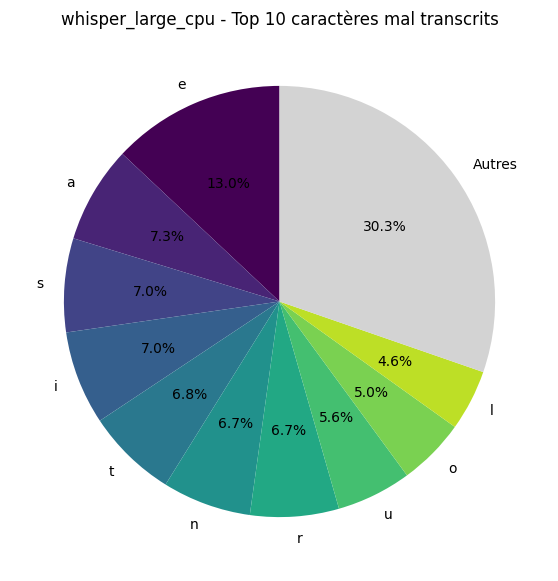


=== Analyse erreurs pour whisper_large_distilled_cpu ===
Top 10 mots mal transcrits : [('deux', 293), ('de', 179), ('trois', 145), ('c’est', 129), ('quatre', 126), ('cent', 104), ('et', 102), ('à', 98), ('la', 94), ('zéro', 89)]


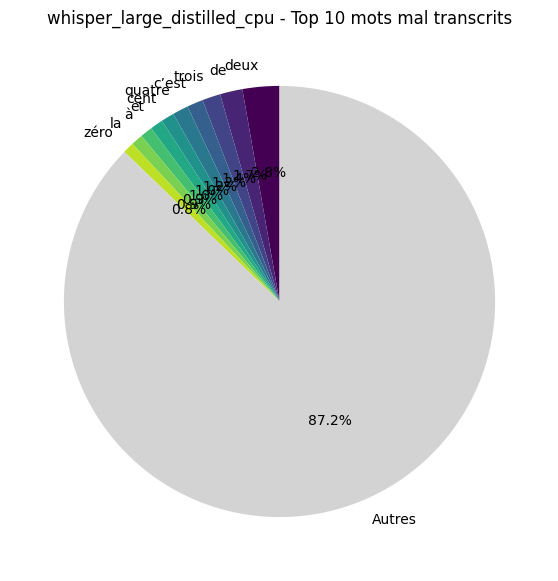

Top 10 caractères mal transcrits : [('e', 12175), ('a', 6704), ('i', 6603), ('s', 6514), ('t', 6334), ('r', 6262), ('n', 6230), ('u', 5220), ('o', 4689), ('l', 4198)]


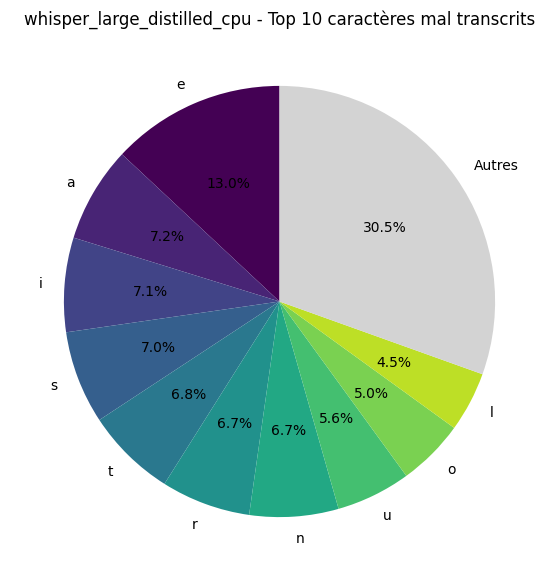


=== Analyse erreurs pour whisper_large_distilled_ct2_cpu ===
Top 10 mots mal transcrits : [('deux', 293), ('de', 149), ('trois', 145), ('c’est', 129), ('quatre', 126), ('cent', 104), ('et', 96), ('zéro', 89), ('à', 87), ('cinq', 84)]


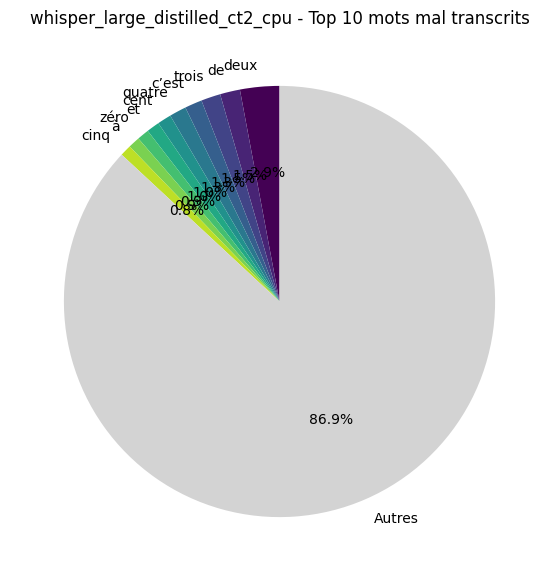

Top 10 caractères mal transcrits : [('e', 12007), ('a', 6612), ('i', 6508), ('s', 6441), ('t', 6239), ('r', 6185), ('n', 6137), ('u', 5133), ('o', 4609), ('l', 4144)]


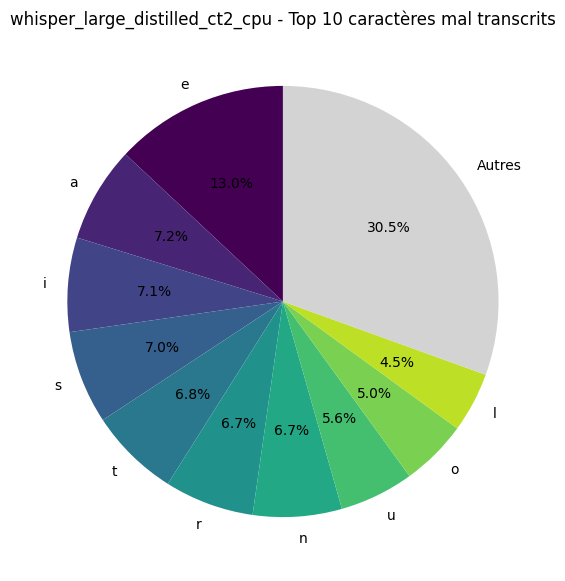


=== Analyse erreurs pour whisper_large_gpu ===
Top 10 mots mal transcrits : [('deux', 293), ('de', 161), ('trois', 145), ('c’est', 129), ('quatre', 126), ('et', 111), ('cent', 103), ('à', 95), ('zéro', 89), ('cinq', 84)]


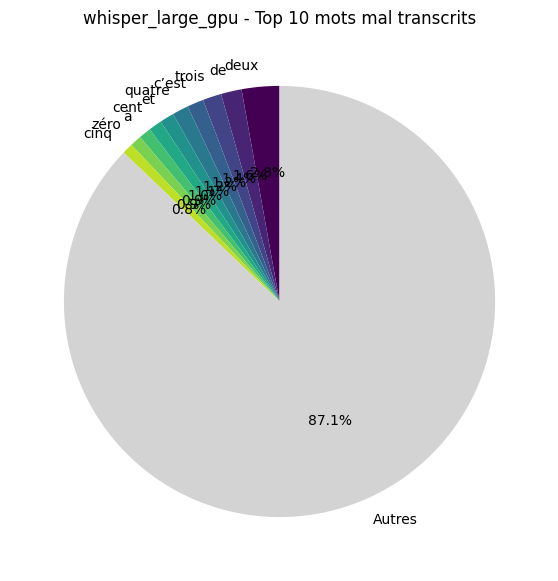

Top 10 caractères mal transcrits : [('e', 12152), ('a', 6720), ('i', 6630), ('s', 6549), ('t', 6369), ('r', 6281), ('n', 6196), ('u', 5198), ('o', 4721), ('l', 4203)]


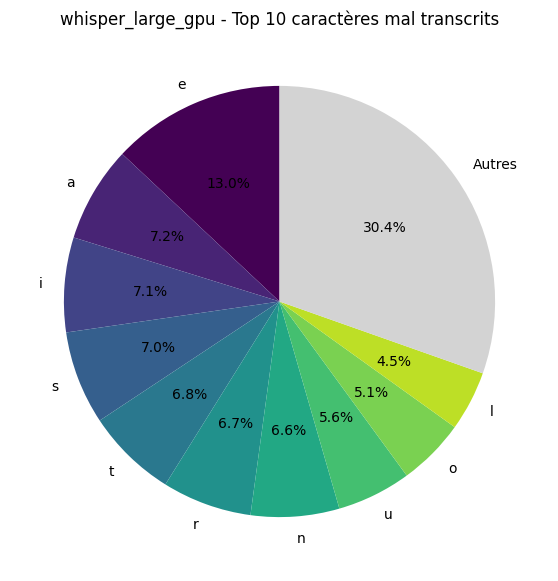


=== Analyse erreurs pour whisper_large_distilled_gpu ===
Top 10 mots mal transcrits : [('deux', 293), ('de', 165), ('trois', 145), ('c’est', 129), ('quatre', 126), ('et', 104), ('cent', 103), ('à', 90), ('zéro', 89), ('la', 85)]


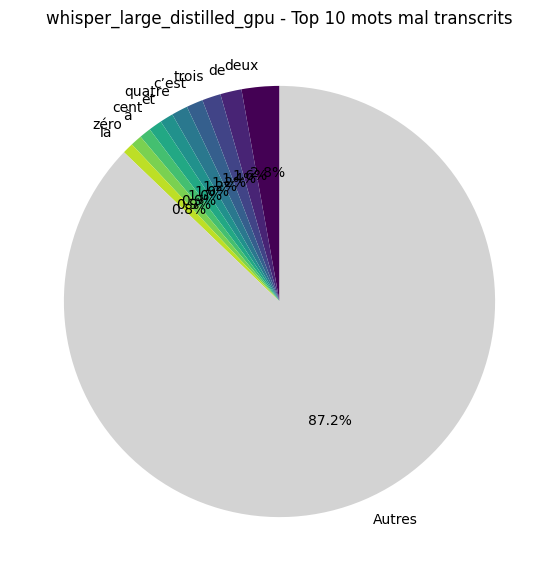

Top 10 caractères mal transcrits : [('e', 11994), ('a', 6626), ('i', 6550), ('s', 6426), ('t', 6226), ('r', 6194), ('n', 6101), ('u', 5151), ('o', 4623), ('l', 4173)]


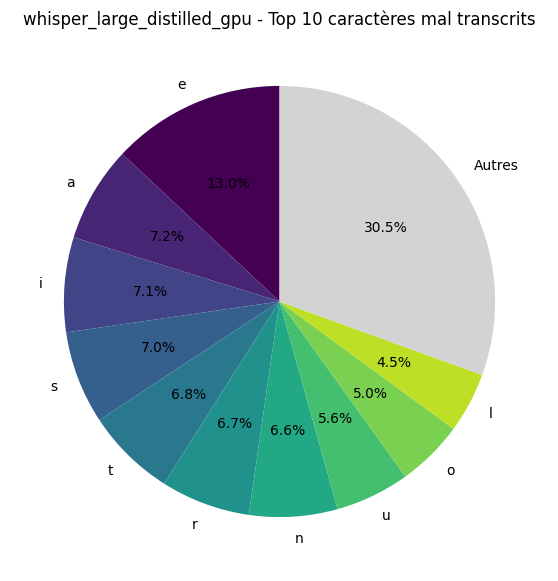


=== Analyse erreurs pour whisper_large_distilled_ct2_gpu ===
Top 10 mots mal transcrits : [('deux', 293), ('de', 148), ('trois', 145), ('c’est', 129), ('quatre', 126), ('cent', 103), ('et', 97), ('zéro', 89), ('à', 87), ('cinq', 84)]


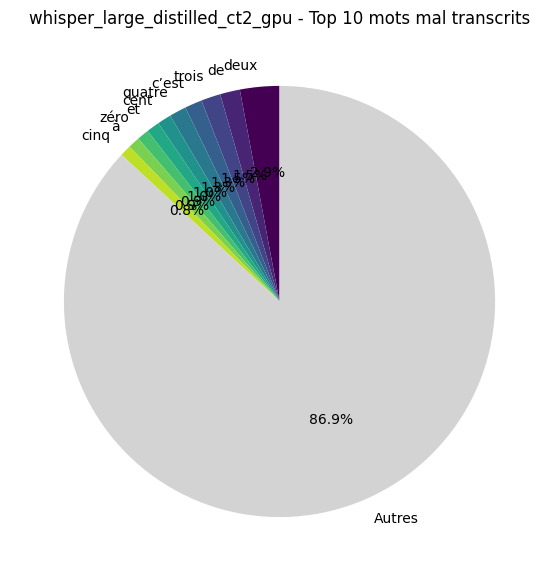

Top 10 caractères mal transcrits : [('e', 11938), ('a', 6601), ('i', 6496), ('s', 6411), ('t', 6215), ('r', 6164), ('n', 6101), ('u', 5121), ('o', 4602), ('l', 4137)]


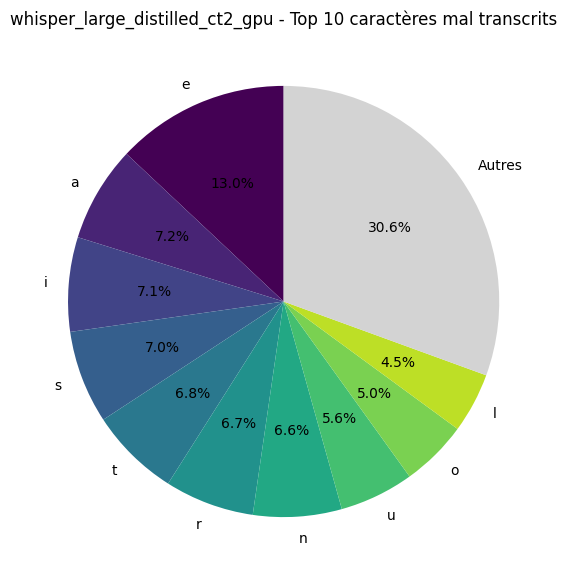

In [35]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# -------------------------------
# Fonction pour extraire mots mal transcrits
# -------------------------------
def get_mistakes(ref_series, hyp_series):
    mistakes = []
    for ref, hyp in zip(ref_series.astype(str), hyp_series.astype(str)):
        ref_words = ref.lower().split()
        hyp_words = hyp.lower().split()
        # On considère comme erreur les mots qui ne correspondent pas à l'index correspondant
        mistakes += [w_ref for w_ref, w_hyp in zip(ref_words, hyp_words) if w_ref != w_hyp]
    return Counter(mistakes)

# -------------------------------
# Fonction pour extraire caractères mal transcrits
# -------------------------------
def get_char_mistakes(ref_series, hyp_series):
    mistakes = []
    for ref, hyp in zip(ref_series.astype(str), hyp_series.astype(str)):
        ref_chars = list(ref.lower().replace(" ", ""))
        hyp_chars = list(hyp.lower().replace(" ", ""))
        # On compare caractère par caractère
        mistakes += [c_ref for c_ref, c_hyp in zip(ref_chars, hyp_chars) if c_ref != c_hyp]
    return Counter(mistakes)

# -------------------------------
# Fonction pour diagramme circulaire
# -------------------------------
def plot_pie_top10(counter, title):
    total = sum(counter.values())
    top10 = counter.most_common(10)
    other_count = total - sum([c for _, c in top10])
    
    labels = [w for w, _ in top10] + ["Autres"]
    sizes = [c for _, c in top10] + [other_count]
    
    import matplotlib.cm as cm
    colors = [cm.viridis(i/10) for i in range(10)] + ["lightgrey"]
    
    fig, ax = plt.subplots(figsize=(7,7))
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(title)
    plt.show()

# -------------------------------
# Liste des modèles
# -------------------------------
models = [
    "whisper_large_cpu",
    "whisper_large_distilled_cpu",
    "whisper_large_distilled_ct2_cpu",
    "whisper_large_gpu",
    "whisper_large_distilled_gpu",
    "whisper_large_distilled_ct2_gpu"
]

# -------------------------------
# Calcul et affichage pour chaque modèle
# -------------------------------
for model in models:
    print(f"\n=== Analyse erreurs pour {model} ===")
    hyp_col = f"{model}_transcription"
    
    # Top 10 mots mal transcrits
    word_mistakes = get_mistakes(df["raw_text"], df[hyp_col])
    print("Top 10 mots mal transcrits :", word_mistakes.most_common(10))
    plot_pie_top10(word_mistakes, f"{model} - Top 10 mots mal transcrits")
    
    # Top 10 caractères mal transcrits
    char_mistakes = get_char_mistakes(df["raw_text"], df[hyp_col])
    print("Top 10 caractères mal transcrits :", char_mistakes.most_common(10))
    plot_pie_top10(char_mistakes, f"{model} - Top 10 caractères mal transcrits")


# Calcul des métriques de précision

In [7]:
import pandas as pd
import jiwer

# Colonnes de transcription
transcription_cols = [col for col in df.columns if col.endswith("_transcription")]

metrics = []

for col in transcription_cols:
    model_name = col.replace("_transcription", "")
    wers, cers, mers, wils, wips = [], [], [], [], []
    subs, ins, dels, hits, refs = [], [], [], [], []
    
    for _, row in df.iterrows():
        reference = str(row["raw_text"]).lower().strip()
        hypothesis = str(row[col]).lower().strip()
        
        # Comparaison détaillée
        measures = jiwer.process_words(reference, hypothesis)
        
        # Scores globaux
        wers.append(measures.wer)
        cers.append(jiwer.cer(reference, hypothesis))
        mers.append(measures.mer)
        wils.append(measures.wil)
        wips.append(measures.wip)
        
        # Comptage des erreurs
        subs.append(measures.substitutions)
        ins.append(measures.insertions)
        dels.append(measures.deletions)
        hits.append(measures.hits)
        
        # Nombre de mots de référence (calcul direct)
        refs.append(len(reference.split()))
    
    metrics.append({
        "model": model_name,
        "WER": sum(wers)/len(wers),
        "CER": sum(cers)/len(cers),
        "MER": sum(mers)/len(mers),
        "WIL": sum(wils)/len(wils),
        "WIP": sum(wips)/len(wips),
        "Substitutions": sum(subs),
        "Insertions": sum(ins),
        "Deletions": sum(dels),
        "Hits": sum(hits),
        "Total_Ref_Words": sum(refs)
    })

accuracy_df = pd.DataFrame(metrics).sort_values(by="WER")

In [6]:
accuracy_df

,model,WER,CER,MER,WIL,WIP,Substitutions,Insertions,Deletions,Hits,Total_Ref_Words
5,whisper_large_distilled_ct2_gpu,0.131082,0.061630,0.127160,0.187031,0.812969,7695,451,1108,85174,93977
2,whisper_large_distilled_ct2_cpu,0.131512,0.061970,0.127266,0.187208,0.812792,7705,451,1109,85163,93977
4,whisper_large_distilled_gpu,0.134273,0.061362,0.132763,0.193833,0.806167,7895,268,1418,84664,93977
3,whisper_large_gpu,0.134541,0.061431,0.133153,0.194621,0.805379,7901,254,1444,84632,93977
1,whisper_large_distilled_cpu,0.136603,0.062748,0.135065,0.196988,0.803012,8038,286,1459,84480,93977
0,whisper_large_cpu,0.142077,0.064943,0.140376,0.205987,0.794013,8500,319,1491,83986,93977


# Définition des métriques d'évaluation de la précision

| Métrique | Définition détaillée                                                                                                                                                                                                                                                                                                                                                           | Calcul dans le code (avec `jiwer`)                                                                 | Interprétation                                                                                                                                            |
| -------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------- |
| WER      | **Word Error Rate (Taux d'erreur sur les mots)** : mesure la proportion de mots mal transcrits par rapport au texte de référence. Elle prend en compte trois types d'erreurs : <br> - **Substitutions** : un mot a été remplacé par un autre<br> - **Insertions** : un mot a été ajouté<br> - **Suppressions** : un mot du texte de référence est absent dans la transcription | `wer(ref, hyp)` où `ref` est le texte de référence et `hyp` la transcription générée par le modèle | Valeur entre 0 et 1. Plus proche de 0 = meilleure transcription. Ex. 0.13 signifie que 13% des mots sont erronés.                                         |
| CER      | **Character Error Rate (Taux d'erreur sur les caractères)** : proportion de caractères incorrects. Utile pour détecter fautes mineures, accents ou contractions.                                                                                                                                                                                                               | `cer(ref, hyp)`                                                                                    | Valeur entre 0 et 1. Plus proche de 0 = meilleure transcription. Ex. 0.06 signifie que 6% des caractères sont erronés.                                    |
| MER      | **Match Error Rate (Taux d'erreurs de correspondance)** : similaire au WER mais plus indulgent ; il évalue combien de mots du texte de référence sont mal alignés avec la transcription, sans pénaliser certaines différences mineures comme la position exacte des mots.                                                                                                      | `process_words(ref, hyp).mer`                                                                      | Valeur entre 0 et 1. Plus proche de 0 = meilleure correspondance globale des mots. Ex. 0.127 signifie que 12.7% des mots sont mal appariés.               |
| WIL      | **Word Information Lost (Information perdue sur les mots)** : fraction d?information du texte de référence qui n?est pas correctement transcrite.                                                                                                                                                                                                                              | `process_words(ref, hyp).wil`                                                                      | Valeur entre 0 et 1. Plus proche de 0 = peu d?information perdue. Ex. 0.187 signifie que 18.7% de l?information des mots est perdue.                      |
| WIP      | **Word Information Preserved (Information conservée sur les mots)** : fraction d?information du texte de référence correctement transcrite. Complémentaire de WIL : WIP = 1 - WIL.                                                                                                                                                                                             | `process_words(ref, hyp).wip`                                                                      | Valeur entre 0 et 1. Plus proche de 1 = plus d?information conservée. Ex. 0.813 signifie que 81.3% de l?information des mots est correctement transcrite. |


# Génération de graphiques de visualisation des mesures de précision

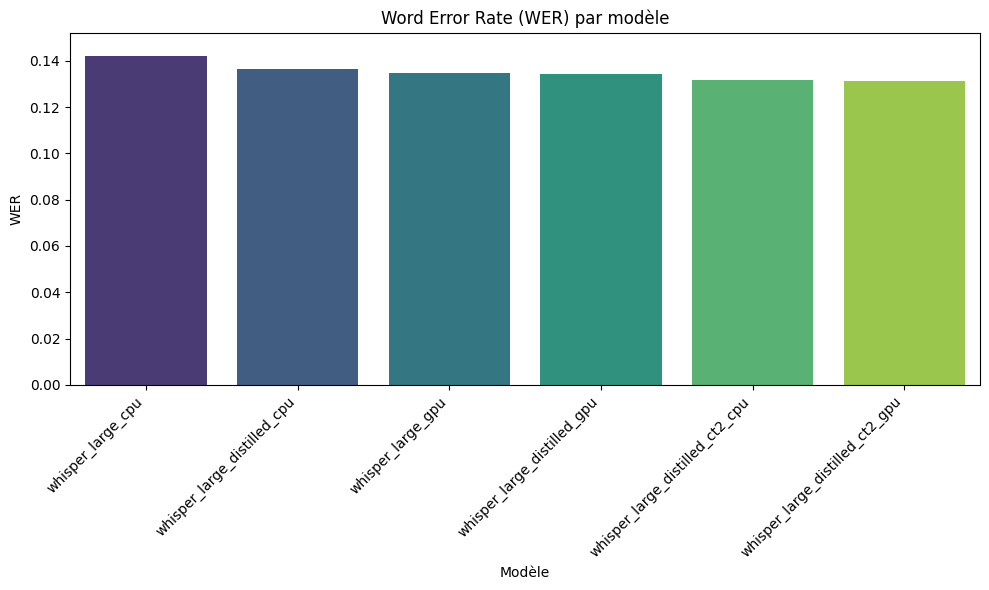

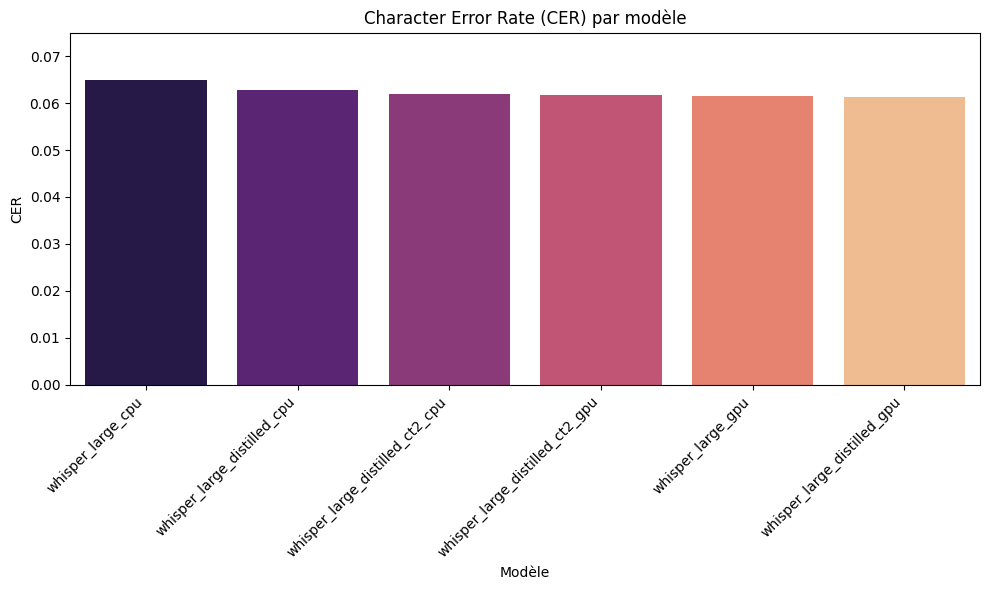

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# === Trier par WER décroissant pour le premier graphique ===
df_wer_sorted = accuracy_df.sort_values("WER", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="model", y="WER", data=df_wer_sorted, hue="model", dodge=False, palette="viridis", legend=False)
plt.title("Word Error Rate (WER) par modèle")
plt.xlabel("Modèle")
plt.ylabel("WER")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, accuracy_df["WER"].max() + 0.01)
plt.tight_layout()
plt.show()

# === Trier par CER décroissant pour le deuxième graphique ===
df_cer_sorted = accuracy_df.sort_values("CER", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="model", y="CER", data=df_cer_sorted, hue="model", dodge=False, palette="magma", legend=False)
plt.title("Character Error Rate (CER) par modèle")
plt.xlabel("Modèle")
plt.ylabel("CER")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, accuracy_df["CER"].max() + 0.01)
plt.tight_layout()
plt.show()


# Observations

- ## La distillation ou la substitution de moteur d'inférence par CT2 ne réduit pas la précision.
- ## Le modèle distilled + CT2 obtient les meilleures perfomances en précisoon WER même si la différence avec les autres modèles est minimale.

# Conclusion
- ## **L'utilisation des méthodes de distillation et de changement de moteur d'inférence permettent d'améliorer significativement la rapidité de transcription**.
- ## **L'utilisation de ces méthodes conserve la précision du modèle**.
- ## **L'utilisation du moteur d'inférence CT2 permet de réduire significativement la différence de rapidité que l'on peut observer si on ne dispose pas de GPU**.
- ## **Les meilleurs résultats rapidité/précision sont obtenus avec le modèle distilled + CT2 en utilisant un GPU**.